In [ ]:
from tensorflow import keras
(x_train, y_train), (x_test, y_test)= keras.datasets.mnist.load_data(path="mnist.npz")

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train[100]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


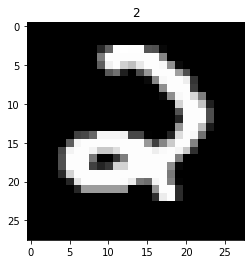

In [ ]:
import matplotlib.pyplot as plt
import random
i= random.randint(0,60000)
plt.imshow(x_train[i], cmap='gray')
plt.title((y_train[i]))
plt.show()


In [ ]:
import numpy as np
print(np.unique(y_train, return_counts = True))
print(np.unique(y_test, return_counts = True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))


In [ ]:
 x_train= x_train/255
 x_test = x_test/255

In [ ]:
print(x_train.max())
print(x_train.min())

1.0
0.0


In [ ]:
from keras.layers import Dense
from keras.layers import Flatten
model = keras.Sequential()
model.add(Flatten(input_shape=(28,28))) 
model.add(Dense(392,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history= model.fit(x_train,y_train,epochs=13,validation_data=(x_test,y_test))

Epoch 1/13
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3511 - accuracy: 0.8963 - val_loss: 0.1005 - val_accuracy: 0.9700
Epoch 2/13
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0840 - accuracy: 0.9748 - val_loss: 0.0809 - val_accuracy: 0.9740
Epoch 3/13
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0518 - accuracy: 0.9840 - val_loss: 0.0665 - val_accuracy: 0.9787
Epoch 4/13
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0366 - accuracy: 0.9890 - val_loss: 0.0738 - val_accuracy: 0.9770
Epoch 5/13
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0251 - accuracy: 0.9921 - val_loss: 0.0659 - val_accuracy: 0.9800
Epoch 6/13
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0216 - accuracy: 0.9932 - val_loss: 0.0715 - val_accuracy: 0.9795
Epoch 7/13
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0148 - accuracy: 0.9949 - val_loss: 0.0716 - val_accuracy:

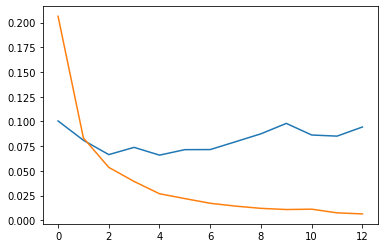

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

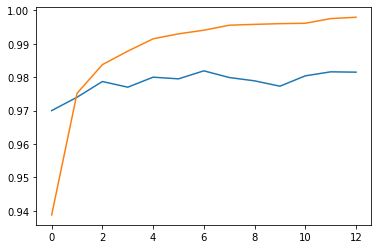

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])

In [ ]:
import numpy as np
y_pred= model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
 print(confusion_matrix(y_pred,y_test))

[[ 970    0    1    0    1    2    3    2    1    2]
 [   1 1127    0    0    0    0    2    0    0    2]
 [   1    1 1018    1    2    0    1    5    2    0]
 [   0    2    2  991    0    7    0    0    4    3]
 [   1    1    2    0  965    2    4    0    4   10]
 [   0    1    0    8    0  874    6    0    4    1]
 [   4    2    2    0    4    4  942    0    0    1]
 [   1    1    4    2    5    0    0 1016    4    8]
 [   2    0    3    3    1    2    0    3  952    4]
 [   0    0    0    5    4    1    0    2    3  978]]


In [ ]:
accuracy_score(y_pred,y_test)

0.9815

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       983
           1       0.99      0.99      0.99      1138
           2       0.99      0.97      0.98      1050
           3       0.98      0.98      0.98      1008
           4       0.96      0.99      0.98       953
           5       0.98      0.99      0.99       890
           6       0.99      0.99      0.99       960
           7       0.97      0.99      0.98      1007
           8       0.98      0.98      0.98       979
           9       0.98      0.96      0.97      1032

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
model.save('mnist.hdf5')

In [ ]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(mode='min',verbose=1,patience=5)
model.fit(x_train,y_train,epochs = 30,validation_data=(x_test,y_test),
          callbacks=[early_stop])

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0070 - accuracy: 0.9977 - val_loss: 0.1185 - val_accuracy: 0.9782
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0073 - accuracy: 0.9974 - val_loss: 0.1300 - val_accuracy: 0.9754
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0061 - accuracy: 0.9979 - val_loss: 0.1077 - val_accuracy: 0.9792
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0045 - accuracy: 0.9984 - val_loss: 0.1139 - val_accuracy: 0.9801
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0068 - accuracy: 0.9976 - val_loss: 0.1203 - val_accuracy: 0.9804
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0055 - accuracy: 0.9980 - val_loss: 0.1179 - val_accuracy: 0.9820
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0070 - accuracy: 0.9978 - val_loss: 0.1026 - val_accuracy:

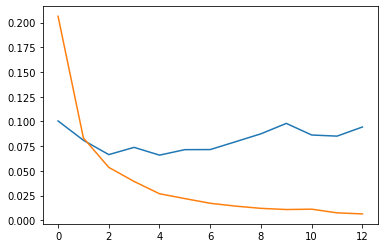

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

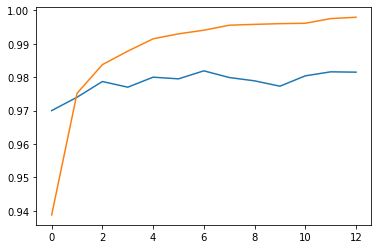

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])


In [ ]:
import numpy as np
y_pred= model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy_score(y_pred,y_test)

0.9833

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       982
           1       0.99      1.00      0.99      1132
           2       0.99      0.99      0.99      1031
           3       0.98      0.98      0.98      1009
           4       0.98      0.98      0.98       989
           5       0.98      0.98      0.98       894
           6       0.98      0.98      0.98       959
           7       0.99      0.98      0.98      1041
           8       0.98      0.98      0.98       970
           9       0.97      0.98      0.98       993

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
print(confusion_matrix(y_pred,y_test))

[[ 970    0    1    0    1    2    3    2    1    2]
 [   1 1127    0    0    0    0    2    0    0    2]
 [   1    1 1018    1    2    0    1    5    2    0]
 [   0    2    2  991    0    7    0    0    4    3]
 [   1    1    2    0  965    2    4    0    4   10]
 [   0    1    0    8    0  874    6    0    4    1]
 [   4    2    2    0    4    4  942    0    0    1]
 [   1    1    4    2    5    0    0 1016    4    8]
 [   2    0    3    3    1    2    0    3  952    4]
 [   0    0    0    5    4    1    0    2    3  978]]


In [ ]:
model.save("mnist1.hdf5")